# 1a opció: Page Rank

## 1.2 Exercicis en SageMath

### Importació de paquets per fer els dibuixos i treure informació necessària

In [305]:
import networkx as nx
import string
import matplotlib.pyplot as plt

### Definició de funcions que farem servir amb SageMath

In [306]:
# Aquesta funció farà tots el apartats A.
def PageRank(graf, p):
    # Primer de tot, agafem les conexions dels grafs mitjançants la seguent instrucció. A Lliurament2apart.ipynb diu
    # que hem de fer servir l'instrucció nx.to_numpy_matrix(graf), però el problema es que aquesta instrucció ja no
    # existeix. No complica molt ja que nx.to_numpy_array(graf) fa una feina semblant.
    conexions = nx.to_numpy_array(graf)
    arrayDeMatriu = []
    for columnes in conexions: # OBS: Es columnes i no files ja que al fer nx.to_numpy_array es retorna una matriu transposta.
        arrayDeMatriu.append(columnes/sum(columnes)) # Dividim els valors de les columnes (0 ó 1) entre la suma.
    matriu = matrix(arrayDeMatriu) # finalment, la convertim en matriu
    segonQuadrantDeATrans = (1-p)*matriu
    segonYTercerQuadrantDeATrans = segonQuadrantDeATrans.augment(zero_vector(RR, segonQuadrantDeATrans.ncols()))
    segonYTercerQuadrantDeA = segonYTercerQuadrantDeATrans.transpose()
    A = segonYTercerQuadrantDeA.augment(vector([p for _ in range(segonYTercerQuadrantDeA.ncols())] + [1]))
    # Calculem els vectors propis de A amb valor propi 1 (sempre existirà per la forma de la matriu)
    vectorPropi = (A - identity_matrix(A.ncols())).right_kernel().basis()[0] #Sabem que la dimensió 
    vectorPropi /= vectorPropi[-1] # La dividim per el seu ultim valor per aixi tindre com última coordenada 1.
    etiquetesDelGraf = list(graf.nodes())
    etiquetaAPageRang = {etiquetesDelGraf[i]: vectorPropi[i] for i in range(len(graf.nodes()))}
    return etiquetaAPageRang

# Aquesta funció farà tot els apartats B.
def ordre(etiquetaAPageRang):
    for i, pag in enumerate(dict(sorted(etiquetaAPageRang.items(), reverse=True, key=lambda item: item[1]))):
        print(f"{i+1}: {pag}")

# Aquesta funció farà tot els apartats C.
def dibuix(graf, rot = None, tit = None, etiquetaAPageRang = None, typeof = "shell"):
    if typeof == "shell":
        typeof = nx.shell_layout(graf, rotate=rot)
    else:
        typeof = nx.circular_layout(['F', 'H', 'J', 'L', 'N', 'P', "O", "M", "K", "I", "G", "E"], scale=2)
        typeof.update(nx.circular_layout(["C", "A", "B", "D"]))
    plt.figure()
    plt.gca().set_aspect('equal', adjustable='box')
    if tit is not None:
        plt.title(tit)
    nx.draw_networkx_labels(graf, pos = typeof, font_color="#000000")
    if etiquetaAPageRang is None:
        nx.draw_networkx_nodes(graf, pos = typeof, node_color="#9FDFF6")
    else:
        nx.draw_networkx_nodes(graf, node_size=300*vector(list(map(lambda x: sqrt(x), etiquetaAPageRang.values()))), pos = typeof, node_color="#9FDFF6")
    nx.draw_networkx_edges(graf, pos = typeof, edge_color=list(map(lambda x: x[2], graf.edges.data("color"))))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

### Graf 1

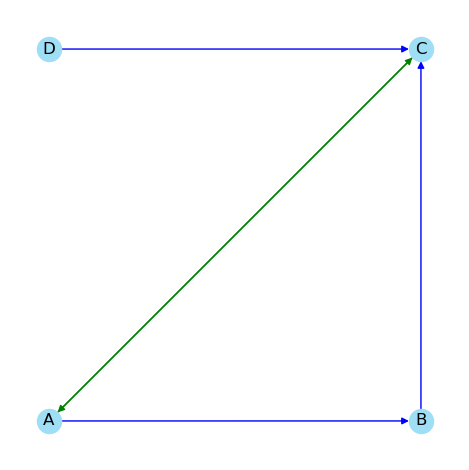

In [307]:
Graf1 = nx.DiGraph()
Graf1.add_nodes_from(range(4))
Graf1.add_edges_from([(0,1),(1,2),(3,2)], color="blue")
Graf1.add_edges_from([(0,2),(2,0)], color="green")
etiquetes1 = dict(zip(Graf1, string.ascii_uppercase)) # Construïm un diccionari per a les etiquetes
Graf1 = nx.relabel_nodes(Graf1, etiquetes1) # Reescrivim les etiquetes
dibuix(Graf1, -2.356194)

#### Apartat A

In [308]:
PR115 = PageRank(Graf1, 0.15)
PR15 = PageRank(Graf1, 0.5)
show(PR115)
show(PR15)

{'A': 1.4901074053137362,
 'B': 0.7832956472583379,
 'C': 1.576596947427925,
 'D': 0.15000000000000002}

{'A': 1.2307692307692308,
 'B': 0.8076923076923077,
 'C': 1.4615384615384617,
 'D': 0.5}

#### Apartat B

In [309]:
print("Per p = 0.15:")
ordre(PR115)
print("Per p = 0.5:")
ordre(PR15)

Per p = 0.15:
1: C
2: A
3: B
4: D
Per p = 0.5:
1: C
2: A
3: B
4: D


#### Apartat C

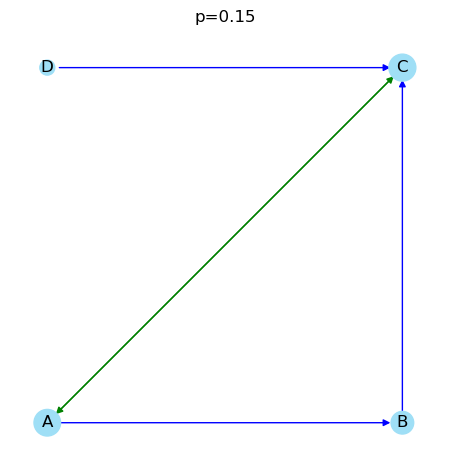

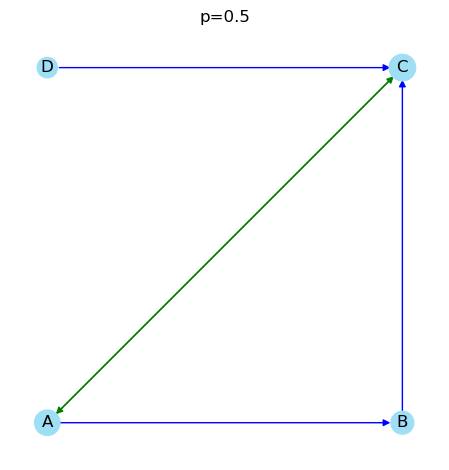

In [310]:
dibuix(Graf1, -2.356194, "p=0.15", PR115)
dibuix(Graf1, -2.356194, "p=0.5", PR15)

### Graf 2

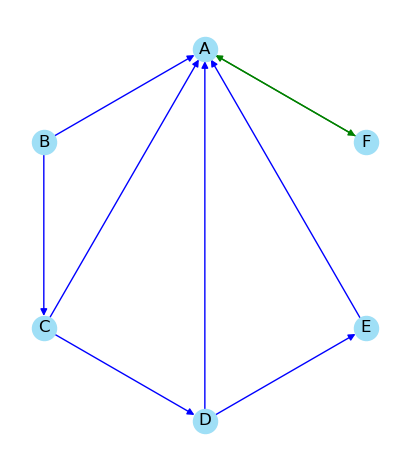

In [311]:
Graf2 = nx.DiGraph()
Graf2.add_nodes_from(range(6))
Graf2.add_edges_from([(1, 0),(2, 0),(3, 0),(4, 0),(1, 2),(2, 3),(3, 4)], color="blue")
Graf2.add_edges_from([(0,5),(5,0)], color="green")
etiquetes2 = dict(zip(Graf2, string.ascii_uppercase)) # Construïm un diccionari per a les etiquetes
Graf2 = nx.relabel_nodes(Graf2, etiquetes2) # Reescrivim les etiquetes
dibuix(Graf2, 1.5707963)

#### Apartat A

In [312]:
PR215 = PageRank(Graf2, 0.15)
PR25 = PageRank(Graf2, 0.5)
show(PR215)
show(PR25)

{'A': 2.6989446790540534,
 'B': 0.15,
 'C': 0.21374999999999997,
 'D': 0.24084375,
 'E': 0.25235859374999997,
 'F': 2.444102977195945}

{'A': 2.036458333333333,
 'B': 0.5,
 'C': 0.625,
 'D': 0.65625,
 'E': 0.6640625,
 'F': 1.5182291666666665}

#### Apartat B

In [313]:
print("Per p = 0.15:")
ordre(PR215)
print("Per p = 0.5:")
ordre(PR25)

Per p = 0.15:
1: A
2: F
3: E
4: D
5: C
6: B
Per p = 0.5:
1: A
2: F
3: E
4: D
5: C
6: B


#### Apartat C

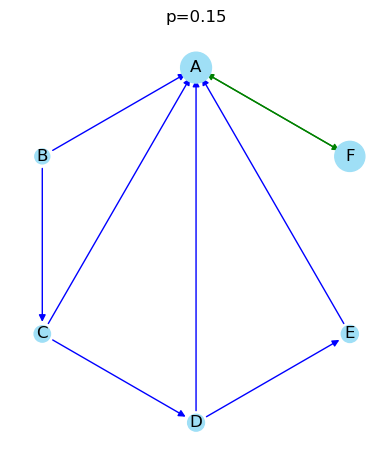

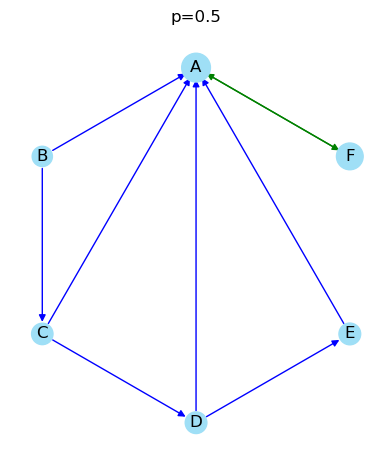

In [314]:
dibuix(Graf2, 1.5707963, "p=0.15", PR215)
dibuix(Graf2, 1.5707963, "p=0.5", PR25)

### Graf 3

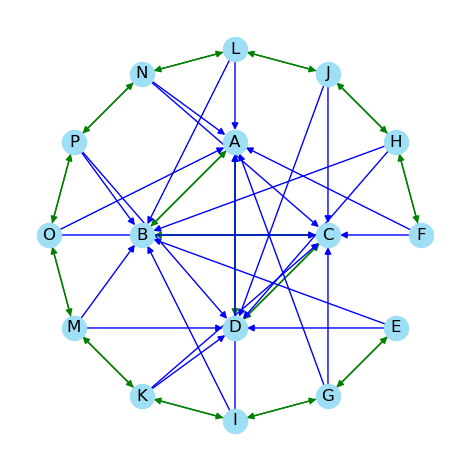

In [315]:
Graf3 = nx.DiGraph()
Graf3.add_nodes_from([string.ascii_uppercase[i] for i in range(16)])
Graf3.add_edges_from([("E", "B"),("E", "D"),("F", "A"), ("F", "C"), ("H", "D"), ("H", "B"), ("J", "C"), ("J", "D"), ("L", "A"), ("L", "B"), ("N", "A"), ("N", "C"), ("P", "B"), ("P", "D"), ("O", "A"), ("O", "C"), ("M", "B"), ("M", "D"), ("K", "D"), ("K", "C"), ("I", "B"), ("I", "A"), ("G", "C"), ("G", "A")], color="blue")
Graf3.add_edges_from([a[::i] for a in [("E","G"), ("G", "I"), ("K", "I"), ("K", "M"), ("M", "O"), ("O", "P"), ("P", "N"), ("N", "L"), ("L", "J"), ("J", "H"), ("H", "F"), ("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")] for i in (-1, 1)], color="green")
dibuix(Graf3, typeof="doubleCircle")

#### Apartat A

In [316]:
PR315 = PageRank(Graf3, 0.15)
PR35 = PageRank(Graf3, 0.5)
show(PR315)
show(PR35)

{'A': 3.242779794693963,
 'B': 3.242779794693963,
 'C': 3.242779794693963,
 'D': 3.242779794693963,
 'E': 0.2060948039862887,
 'F': 0.2060948039862887,
 'G': 0.26397554817077046,
 'H': 0.26397554817077046,
 'I': 0.26156244882190727,
 'J': 0.26156244882190727,
 'K': 0.26102421099114603,
 'L': 0.26102421099114603,
 'M': 0.2609044264305446,
 'N': 0.2609044264305446,
 'O': 0.26087897221141676,
 'P': 0.26087897221141676}

{'A': 2.0325075337034098,
 'B': 2.03250753370341,
 'C': 2.03250753370341,
 'D': 2.0325075337034098,
 'E': 0.5851356066613799,
 'F': 0.5851356066613798,
 'G': 0.6810848532910388,
 'H': 0.681084853291039,
 'I': 0.6684980174464711,
 'J': 0.6684980174464711,
 'K': 0.6668992862807295,
 'L': 0.6668992862807295,
 'M': 0.6666962727993656,
 'N': 0.6666962727993655,
 'O': 0.6666708961141952,
 'P': 0.6666708961141949}

#### Apartat B

In [317]:
print("Per p = 0.15:")
ordre(PR315)
print("Per p = 0.5:")
ordre(PR35)

Per p = 0.15:
1: A
2: B
3: C
4: D
5: G
6: H
7: I
8: J
9: K
10: L
11: M
12: N
13: O
14: P
15: E
16: F
Per p = 0.5:
1: B
2: C
3: A
4: D
5: H
6: G
7: I
8: J
9: K
10: L
11: M
12: N
13: O
14: P
15: E
16: F


#### Apartat C

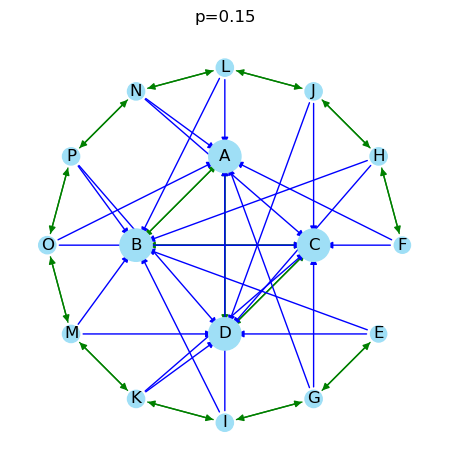

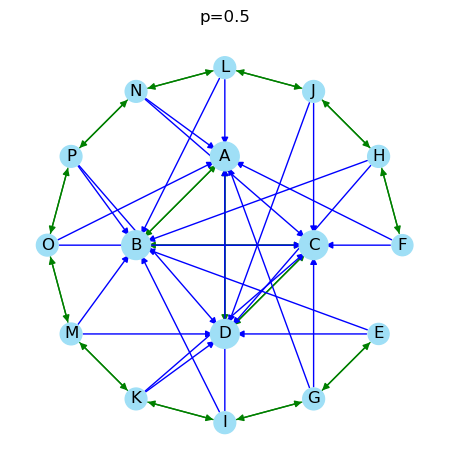

In [318]:
dibuix(Graf3, etiquetaAPageRang=PR315, tit="p=0.15", typeof="doubleCircle")
dibuix(Graf3, etiquetaAPageRang=PR35, tit="p=0.5", typeof="doubleCircle")